The purpose of this python script is to read in, clean, and filter avalanche accident data provided by the Colorada Avalanche Information Center (CAIC).

In [1]:
# Read in the necessary packages for this code to run
import pandas as pd
from numpy.ma.core import log
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Import the csv file you would like to use. New files can be read in each year and this analysis can be continued to 
# be used if this line is changed.
avalanche_accidents = pd.read_csv('/Users/f67f911/Desktop/ERTH450/Semester_Project/Accident_Summary.csv')
# Look at the first part of the dataframe to make sure it was read in correctly.
avalanche_accidents.head()

,AvyYear,YYYY,MM,DD,Location,Setting,State,PrimaryActivity,TravelMode,Killed,Description
0,2021,2021,5,13,"Ruth Glacier, Denali National Park and Preserve",BC,AK,Climber,Foot,1,"2 climbers caught in serac fall, 1 killed"
1,2021,2021,3,27,Matanuska Glacier,BC,AK,Motorized Guided client,Ski,1,1 heliskier killed
2,2021,2021,3,22,Lime Creek south of Edwards,BC,CO,Sidecountry Rider,Ski,1,1 sidecountry skier caught and killed
3,2021,2021,3,20,"Frog Lake Cliffs, north of Donner Pass",BC,CA,Snowmobiler,Foot,1,1 snowmobiler caught and killed
4,2021,2021,2,27,"Tiger Peak, north of Burke",BC,ID,Snowmobiler,Snowmobile,1,"4 snowmobilers caught, 1 buried, 1 buried and ..."


In [22]:
# It can be beneficial for the data to be organized in a datetime format. Use these lines to change the column names
# used in the dataframes, and to then aggregated the data in a single column to be used during the rest of the analysis.
# Create a new variable to save the data in a DateTime format
date = []
# Rename the column names to be more descriptive
mapping = {avalanche_accidents.columns[1]:'year', avalanche_accidents.columns[2]:'month', 
           avalanche_accidents.columns[3]:'day'}
# Rename the columns by what we have assigned in the variable mapping
avalanche_accidents = avalanche_accidents.rename(columns = mapping)
# Populate the new column with the datetime format
avalanche_accidents['date'] =  pd.to_datetime(avalanche_accidents[['year', 'month', 'day']], format = '%Y/%M/%D')


In [19]:
avalanche_accidents.head()

,AvyYear,year,month,day,Location,Setting,State,PrimaryActivity,TravelMode,Killed,Description,date
0,2021,2021,5,13,"Ruth Glacier, Denali National Park and Preserve",BC,AK,Climber,Foot,1,"2 climbers caught in serac fall, 1 killed",2021-05-13
1,2021,2021,3,27,Matanuska Glacier,BC,AK,Motorized Guided client,Ski,1,1 heliskier killed,2021-03-27
2,2021,2021,3,22,Lime Creek south of Edwards,BC,CO,Sidecountry Rider,Ski,1,1 sidecountry skier caught and killed,2021-03-22
3,2021,2021,3,20,"Frog Lake Cliffs, north of Donner Pass",BC,CA,Snowmobiler,Foot,1,1 snowmobiler caught and killed,2021-03-20
4,2021,2021,2,27,"Tiger Peak, north of Burke",BC,ID,Snowmobiler,Snowmobile,1,"4 snowmobilers caught, 1 buried, 1 buried and ...",2021-02-27


In [23]:
# This line can be changed to filter the dataset by different states. For this example, we are using the state of 
# Montana. 
mt_accidents = avalanche_accidents.loc[avalanche_accidents['State'] == 'MT']
# Look at the first part of the dataframe to make sure it was read in correctly.
mt_accidents.head()

,AvyYear,year,month,day,Location,Setting,State,PrimaryActivity,TravelMode,Killed,Description,date
13,2021,2021,2,14,"Beehive Basin, north of Big Sky Montana",BC,MT,Backcountry Tourer,Snowboard,1,"2 splitboarders caught, 1 partially buried and...",2021-02-14
16,2021,2021,2,6,"Wounded Buck Creek, northwest of Wildcat Lake",BC,MT,Snowmobiler,Snowmobile,1,"5 snowmobilers caught, 1 partially buried-crit...",2021-02-06
45,2020,2020,1,1,"Near Lake Dinah, west of Seeley Lake",BC,MT,Snowmobiler,Snowmobile,2,"3 snowmobilers caught, 2 buried and killed, 1 ...",2020-01-01
56,2019,2019,2,26,"Truman Gulch, Bridger Range",BC,MT,Backcountry Tourer,Ski,1,"1 skier caught, partially buried-critical, and...",2019-02-26
61,2019,2019,1,25,"Near Bell Lake, Tobacco Root Mountains",BC,MT,Backcountry Tourer,Ski,1,"4 backcountry tourers caught, 1 injured, 1 killed",2019-01-25


In [8]:
# Use this code to export the new data as a .csv file. This can be beneficial if additional information should be 
# added to the data. 
# Make sure the mt_accidents is in the form of a pandas dataframe
mt_accidents = pd.DataFrame()
# Export to a csv file. Make sure to designate the location you would like to export the data to, as well as the 
# name of the csv file you would like to create
mt_accidents.to_csv('mt_summary.csv')

Now that the data is cleaned up and filtered, we can begin to start plotting it and looking at trends. Use the following code to plot these trends in US avalanches.

In [25]:
# Set the default size of the plots so we can visualize the information in a beneficial way
sns.set(rc = {'figure.figsize': (15,8)})

[Text(0.5, 1.0, 'Avalanche Fatalities by Recreation Type')]

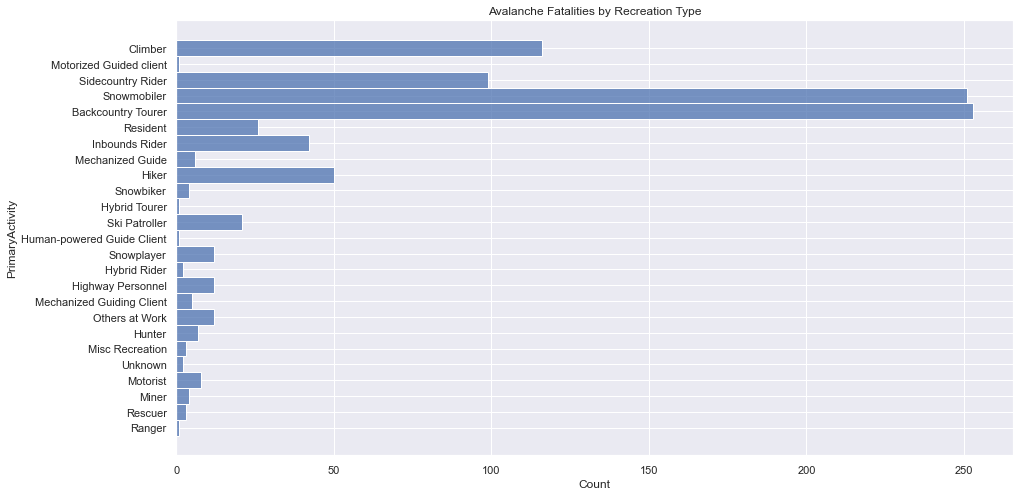

In [26]:
# Look at the number of avalanche fatalities by different activity types for the entire country
sns.histplot(data = avalanche_accidents, y = 'PrimaryActivity').set(title = 'Avalanche Fatalities by Recreation Type')


[Text(0.5, 1.0, 'Montana Avalanche Fatalities by Recreation Type')]

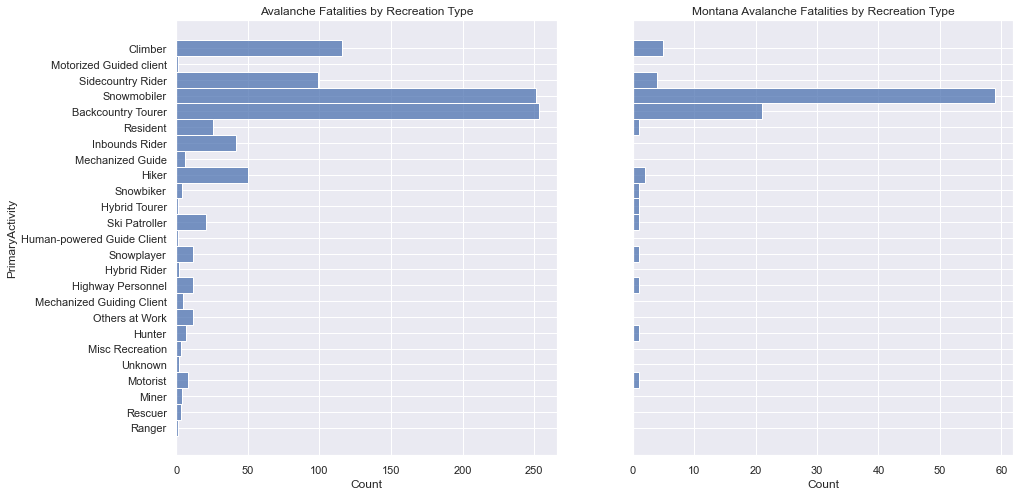

In [28]:
# You can also graph the state data side-by-side with the entire country data to identify differences in trends
# Create the ability to graph the two plots side by side. Sharey = True when you would like the two graphs to share 
# a y-axis
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True)
# Create the first graph, name ax as ax1
sns.histplot(data = avalanche_accidents, y = 'PrimaryActivity', ax = ax1).set(title = 'Avalanche Fatalities by Recreation Type')
# Create the second graph, name ax as ax2
sns.histplot(data = mt_accidents, y = 'PrimaryActivity', ax = ax2).set(title = 'Montana Avalanche Fatalities by Recreation Type')


The data as it is can be difficult to interpret, especially with recreation types such as snowmobilers and snowbikers being parsed out, even though the mode of travel is mostly the same. We can therefore create easier to understand distinctions of the activity types.

In [35]:
# Create an empty array for the activity type names
ActivityType = []
# Create a for loop to cycle through the primary activities of the avalanche_accidents data to create new activity 
# type distinctions
for value in avalanche_accidents['PrimaryActivity']:
    if value == 'Snowmobiler' or value == 'Snowbiker' or value == 'Motorized Guided client' or value == 'Mechanized Guiding Client':
        ActivityType.append('Motorized')
    elif value == 'Backcountry Tourer' or value == 'Hybrid Tourer' or value == 'Sidecountry Rider':
        ActivityType.append('Tourer')
    elif value == 'Inbounds Rider':
        ActivityType.append('Inbounds Rider')
    elif value == 'Climber':
        ActivityType.append('Climber')
    elif value == 'Hunter' or value == 'Hiker':
        ActivityType.append('Hiker')
    elif value == 'Resident' or value == 'Snowplayer':
        ActivityType.append('Resident')
    elif value == 'Ski Patroller' or value == 'Highway Personnel':
        ActivityType.append('Worker')
    elif value == 'Motorist':
        ActivityType.append('Motorist')
    else:
        ActivityType.append('NA')
# Populate a new column in the avalanche_accidents dataframe with these new values    
avalanche_accidents['ActivityType'] = ActivityType

In [36]:
# Check the data to make sure the new column was populated correctly
avalanche_accidents.head()

,AvyYear,year,month,day,Location,Setting,State,PrimaryActivity,TravelMode,Killed,Description,date,ActivityType
0,2021,2021,5,13,"Ruth Glacier, Denali National Park and Preserve",BC,AK,Climber,Foot,1,"2 climbers caught in serac fall, 1 killed",2021-05-13,Climber
1,2021,2021,3,27,Matanuska Glacier,BC,AK,Motorized Guided client,Ski,1,1 heliskier killed,2021-03-27,Motorized
2,2021,2021,3,22,Lime Creek south of Edwards,BC,CO,Sidecountry Rider,Ski,1,1 sidecountry skier caught and killed,2021-03-22,Tourer
3,2021,2021,3,20,"Frog Lake Cliffs, north of Donner Pass",BC,CA,Snowmobiler,Foot,1,1 snowmobiler caught and killed,2021-03-20,Motorized
4,2021,2021,2,27,"Tiger Peak, north of Burke",BC,ID,Snowmobiler,Snowmobile,1,"4 snowmobilers caught, 1 buried, 1 buried and ...",2021-02-27,Motorized


In [39]:
# Do the same for the state Data. The potential primary activity types may differ, so your code may need to be changed
ActivityType = []
for value in mt_accidents['PrimaryActivity']:
    if value == 'Snowmobiler' or value == 'Snowbiker':
        ActivityType.append('Motorized')
    elif value == 'Backcountry Tourer' or value == 'Hybrid Tourer' or value == 'Sidecountry Rider':
        ActivityType.append('Tourer')
    elif value == 'Climber':
        ActivityType.append('Climber')
    elif value == 'Hunter' or value == 'Hiker':
        ActivityType.append('Hiker')
    elif value == 'Resident' or value == 'Snowplayer':
        ActivityType.append('Resident')
    elif value == 'Ski Patroller' or value == 'Highway Personnel':
        ActivityType.append('Worker')
    elif value == 'Motorist':
        ActivityType.append('Motorist')
    else:
        ActivityType.append('NA')
mt_accidents['ActivityType'] = ActivityType

/var/folders/1h/qds9mkm123b7fhmghg50vg6w62xq56/T/ipykernel_30205/1768135690.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_accidents['ActivityType'] = ActivityType


In [40]:
# Check the data to make sure it has been changed correctly.
mt_accidents.head()

,AvyYear,year,month,day,Location,Setting,State,PrimaryActivity,TravelMode,Killed,Description,date,ActivityType
13,2021,2021,2,14,"Beehive Basin, north of Big Sky Montana",BC,MT,Backcountry Tourer,Snowboard,1,"2 splitboarders caught, 1 partially buried and...",2021-02-14,Tourer
16,2021,2021,2,6,"Wounded Buck Creek, northwest of Wildcat Lake",BC,MT,Snowmobiler,Snowmobile,1,"5 snowmobilers caught, 1 partially buried-crit...",2021-02-06,Motorized
45,2020,2020,1,1,"Near Lake Dinah, west of Seeley Lake",BC,MT,Snowmobiler,Snowmobile,2,"3 snowmobilers caught, 2 buried and killed, 1 ...",2020-01-01,Motorized
56,2019,2019,2,26,"Truman Gulch, Bridger Range",BC,MT,Backcountry Tourer,Ski,1,"1 skier caught, partially buried-critical, and...",2019-02-26,Tourer
61,2019,2019,1,25,"Near Bell Lake, Tobacco Root Mountains",BC,MT,Backcountry Tourer,Ski,1,"4 backcountry tourers caught, 1 injured, 1 killed",2019-01-25,Tourer


[Text(0.5, 1.0, 'Montana Avalanche Fatalities by Activity Type')]

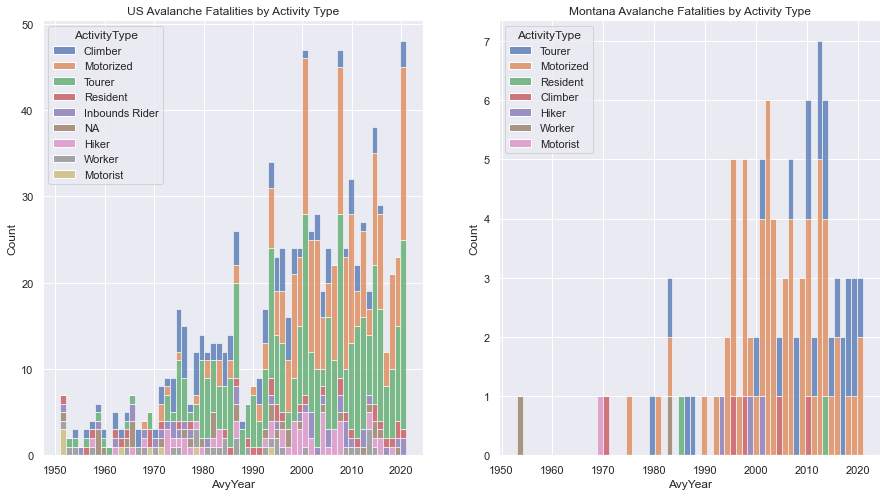

In [41]:
# Look at the country and state differences side by side. It is important to note that some of the activity type codes
# may not be represented by the state data. 
# If you would like just one of the graphs on its own, simply copy and paste one of the single histogram plots in its 
# own line of code
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = False)
sns.histplot(data= avalanche_accidents, x = 'AvyYear', hue = 'ActivityType', bins = 60,legend = True, multiple = 'stack', ax = ax1).set(title = 'US Avalanche Fatalities by Activity Type')
sns.histplot(data= mt_accidents, x = 'AvyYear', bins = 60, hue = 'ActivityType', legend = True, multiple = 'stack', ax = ax2).set(title = 'Montana Avalanche Fatalities by Activity Type')

This is the end of this python notebook. If any figure would like to be saved, use the "plt.savefig('pathname.png') to export this graph. Further analysis can be done, such as filtering the data by year, or by excluding different activity types. This code is meant to start as a baseline for further analysis using the CAIC comiled data. 